In [31]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [32]:
df = pd.read_csv("train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [33]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

*Age has some missing values. It is important to deal with them as we can't perform any transformations if there are missing values in the dataset*

In [35]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [36]:
#Extracting X and y
X = df.iloc[:, 1:3]  #age, fare
y = df.iloc[:,0] #survived

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

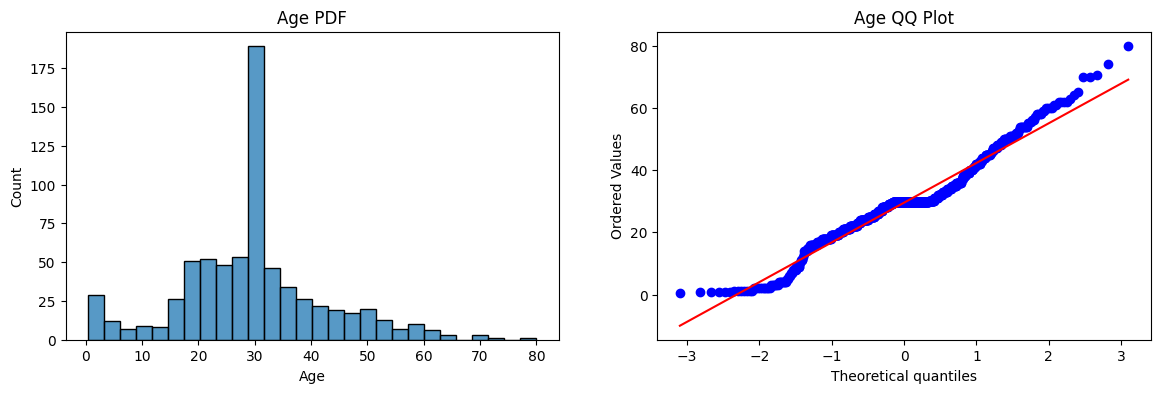

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

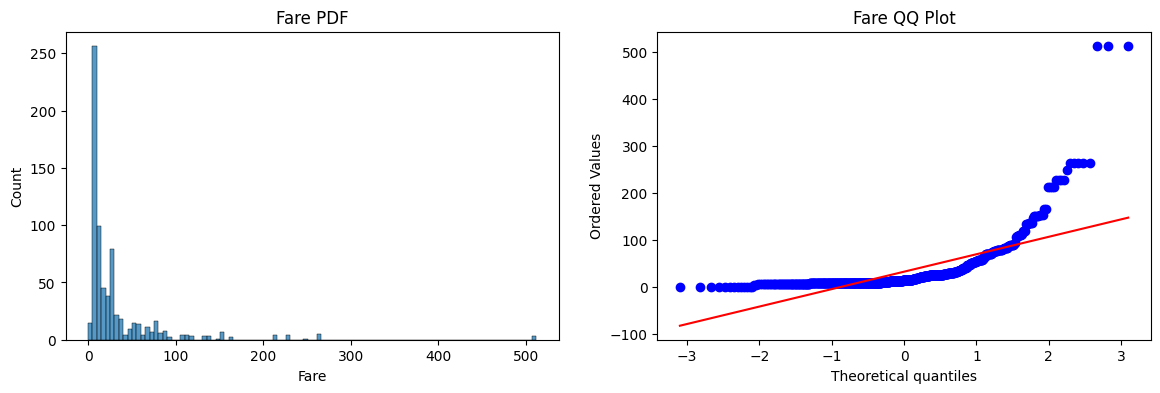

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

*Right skewed*

In [40]:
# Logistic and decision tree classifier 

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [41]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))


Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


##### performing log transform

In [42]:
trf = FunctionTransformer(func = np.log1p)

#np.log1p first adds 1 to each data point and then evaluates the log of it

In [43]:
X_train_tran = trf.fit_transform(X_train)
X_test_tran = trf.fit_transform(X_test)

In [44]:
clf.fit(X_train_tran, y_train)
clf2.fit(X_train_tran, y_train)

y_pred = clf.predict(X_test_tran)
y_pred2 = clf2.predict(X_test_tran)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


*There is an improvement in the accuracy of LR but not in DT*

In [45]:
#For cross validation we will transform the entire X variable

X_tran = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_tran, y, scoring= "accuracy", cv = 10)))
print("DT", np.mean(cross_val_score(clf2, X_tran, y, scoring= "accuracy", cv = 10)))

LR 0.678027465667915
DT 0.6655930087390761


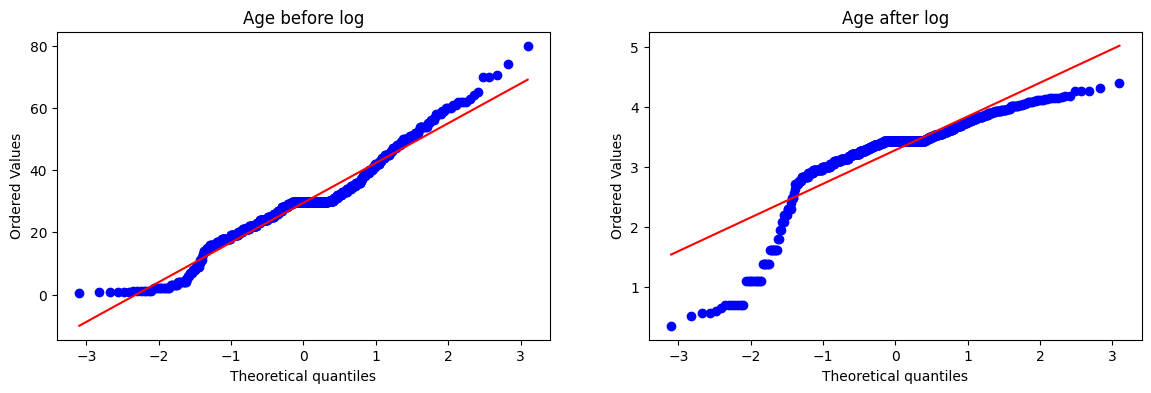

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist = "norm", plot = plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_tran['Age'], dist="norm", plot=plt)
plt.title('Age after log')

plt.show()

*Age has not improved after transformation*

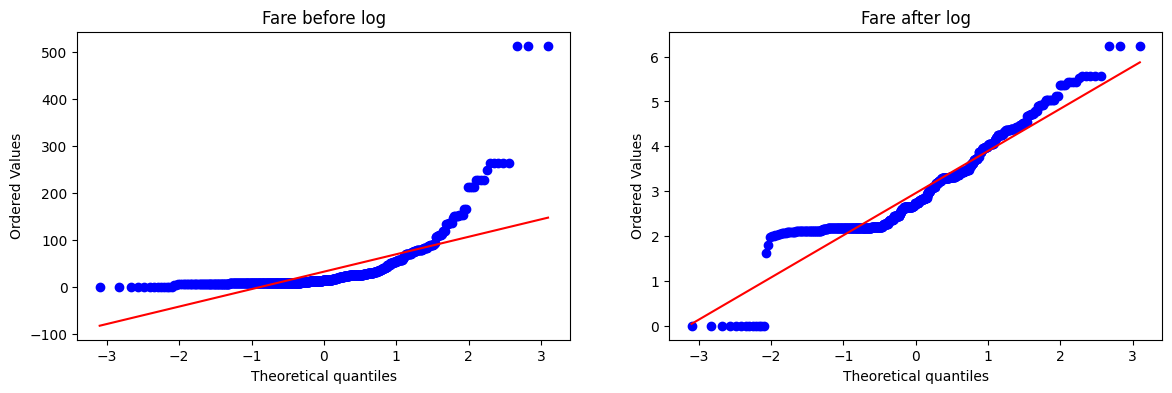

In [47]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist = "norm", plot = plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_tran['Fare'], dist="norm", plot=plt)
plt.title('Fare after log')

plt.show()

*Fare improved after transformation. It has transformed closer to normal*

*so now we will only transform fare and not age*

In [48]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder= 'passthrough')

X_train_tran2 = trf2.fit_transform(X_train)
X_test_tran2 = trf2.fit_transform(X_test)

In [49]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_tran2, y_train)
clf2.fit(X_train_tran2, y_train)

y_pred = clf.predict(X_test_tran2)
y_pred2 = clf2.predict(X_test_tran2)

print("Accuracy LR" , accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


##### Square and Square root transform

In [50]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6431335830212235


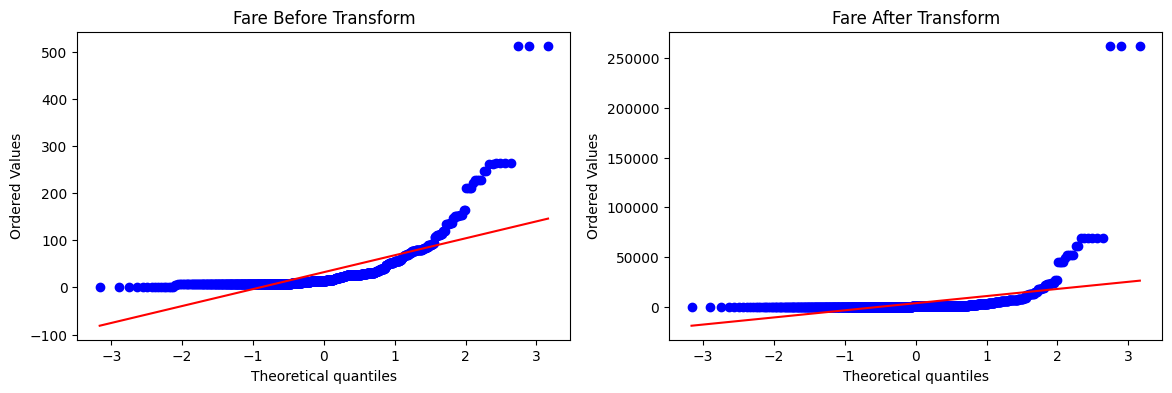

In [51]:
apply_transform(lambda x : x**2)

Accuracy 0.6262796504369538


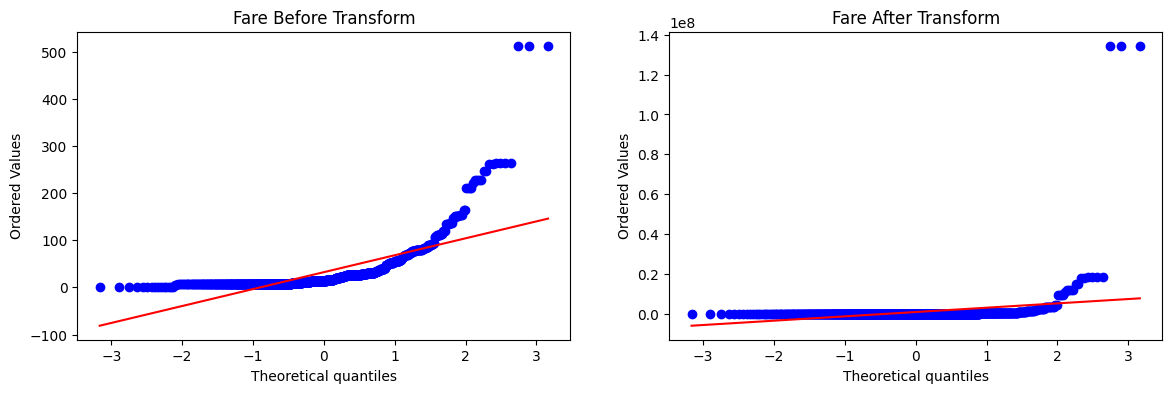

In [52]:
apply_transform(lambda x : x**3)

Accuracy 0.6589013732833957


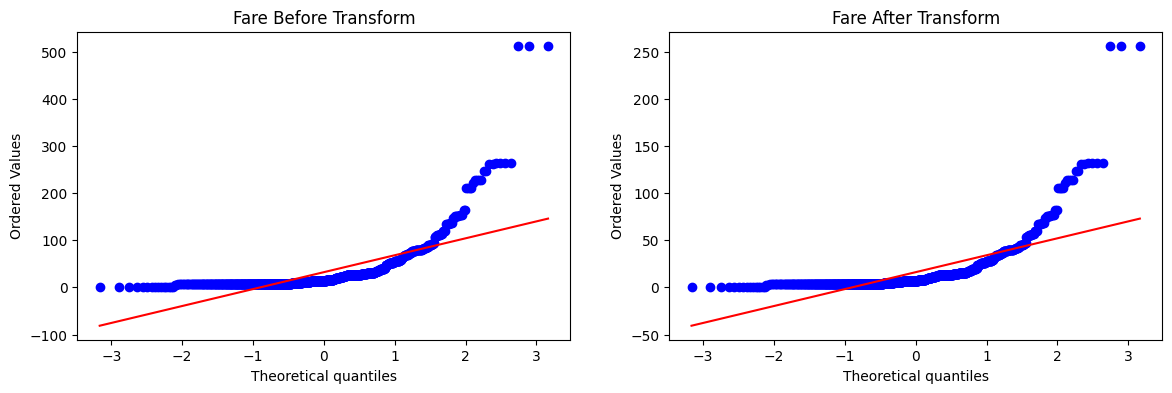

In [53]:
apply_transform(lambda x : x**1/2)

Accuracy 0.61729088639201


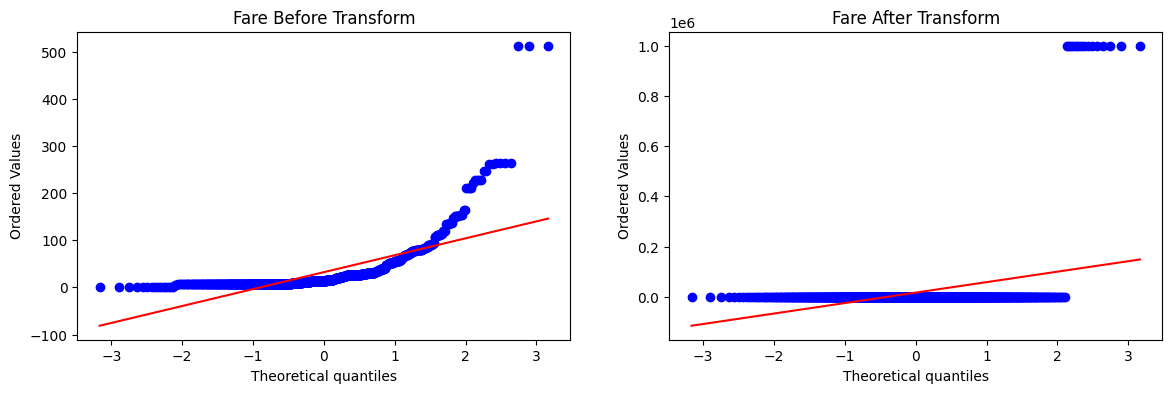

In [54]:
apply_transform(lambda x : 1/(x+0.000001))

Accuracy 0.6195131086142323


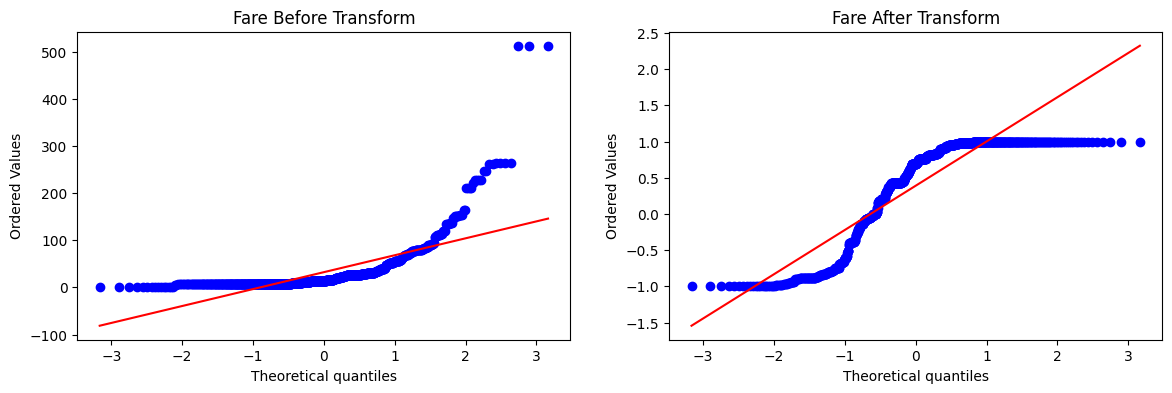

In [55]:
apply_transform(np.sin)

### Power Transformers

In [56]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [64]:
df2 = pd.read_csv("concrete_data.csv")

In [62]:
df2.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [65]:
df2.shape

(1030, 9)

In [66]:
df2.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [67]:
df2.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


*No negative value but data does contain min value as 0*

In [68]:
X =df2.drop(columns = ['concrete_compressive_strength'])

y = df2.iloc[:,-1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


##### Applying Linear Regression without any transformation

In [70]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314848

In [71]:
#Cross validating 

lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

0.4609940491662864

*After cross validating, it turns out that the accuracy is worse*

##### Plotting them without any transformation

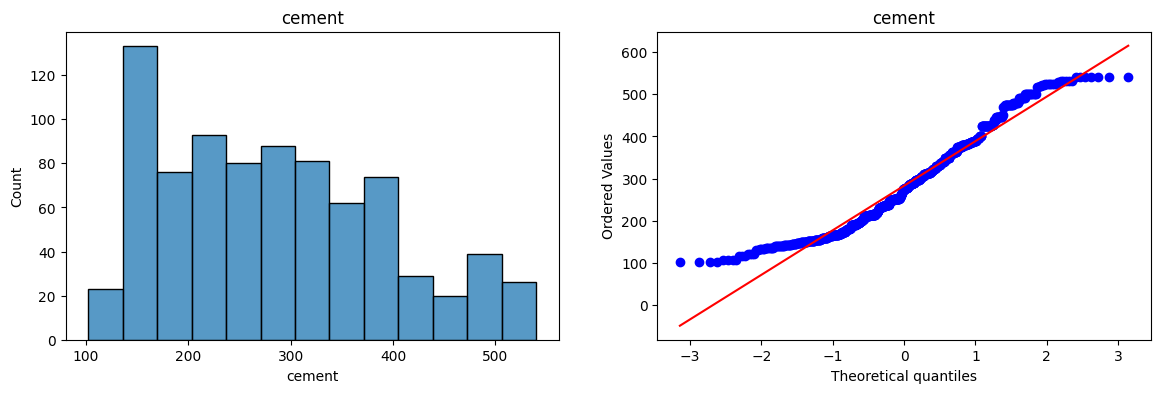

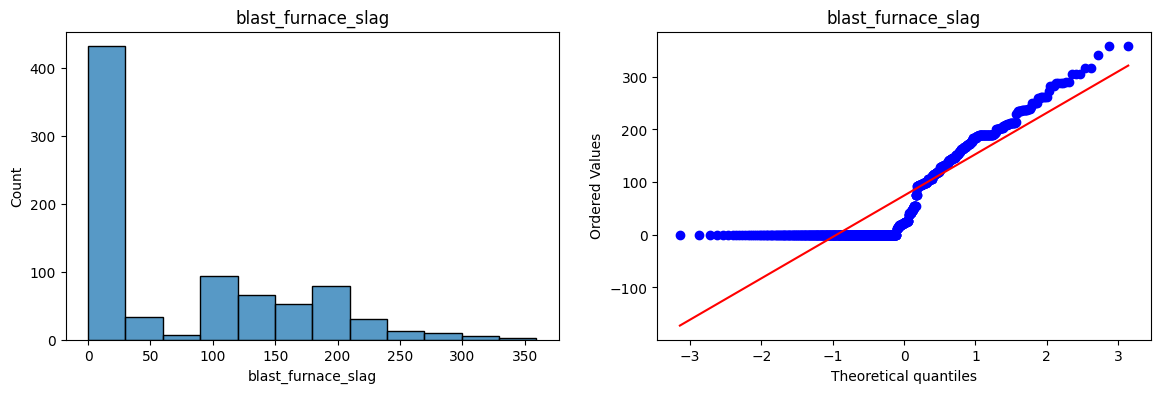

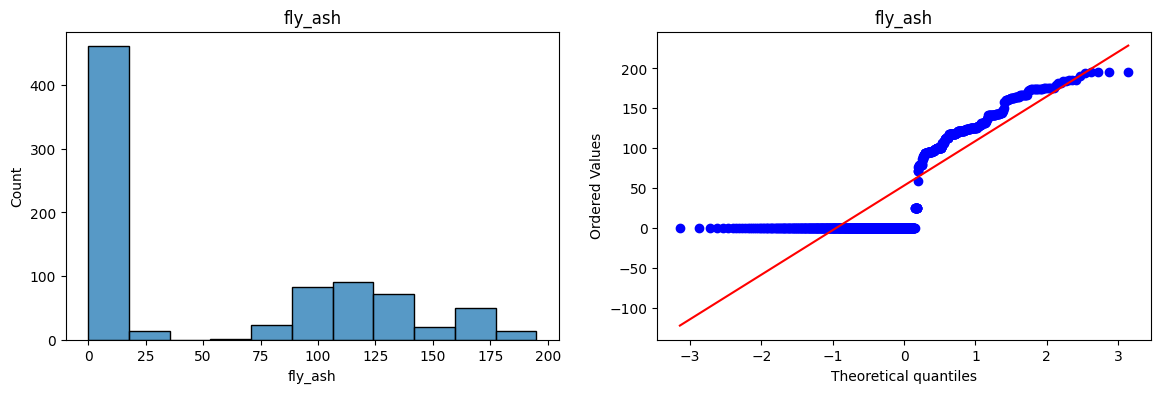

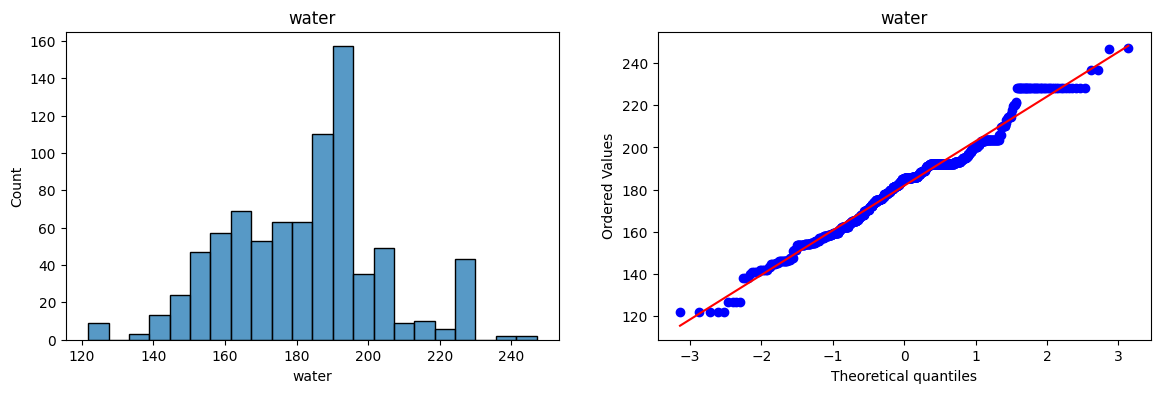

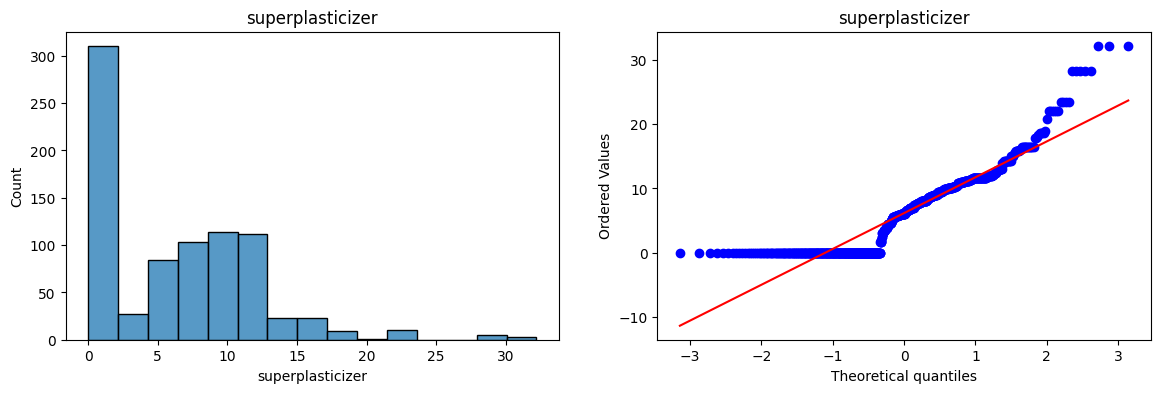

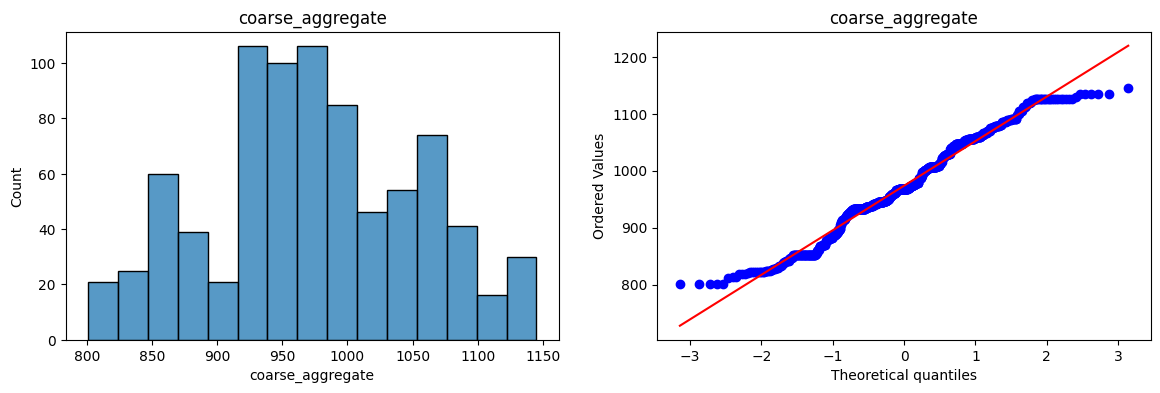

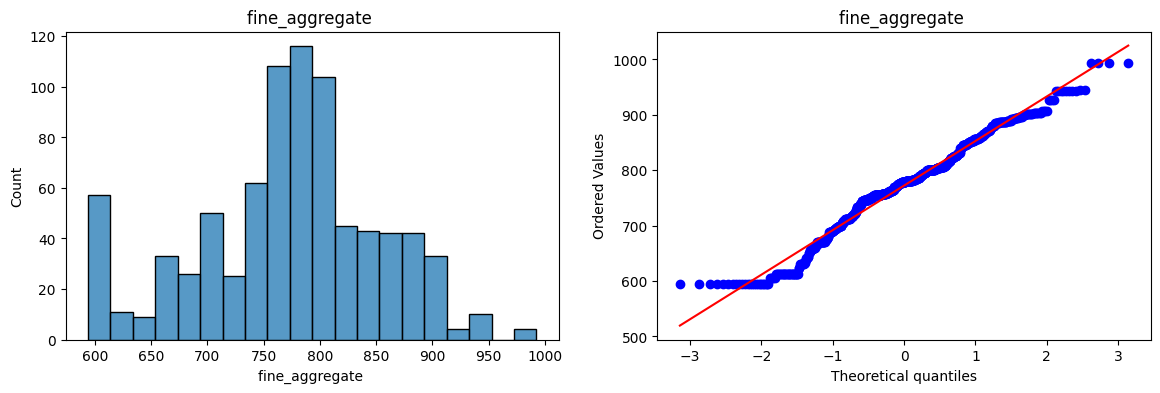

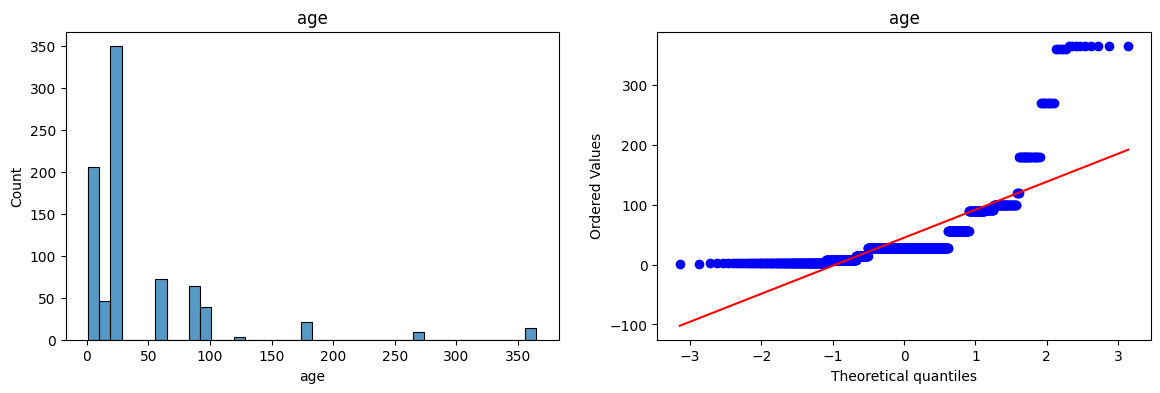

In [72]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

##### Applying Linear Regression after Box-Cox transformation

In [73]:
pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00001) #we will add 0.00001 because some values are 0, and the restriction of box cox is that x>0

X_test_transformed = pt.transform(X_test+0.00001)

pd.DataFrame({'cols' : X_train.columns, 'box_cox_lambda' : pt.lambdas_})

,cols,box_cox_lambda
0,cement,0.177025
1,blast_furnace_slag,0.027842
2,fly_ash,-0.044554
3,water,0.772682
4,superplasticizer,0.113892
5,coarse_aggregate,1.129813
6,fine_aggregate,1.782018
7,age,0.066630


In [74]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8054599377211109

In [75]:

# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219863

*Accuracy has increased by almost 20%*

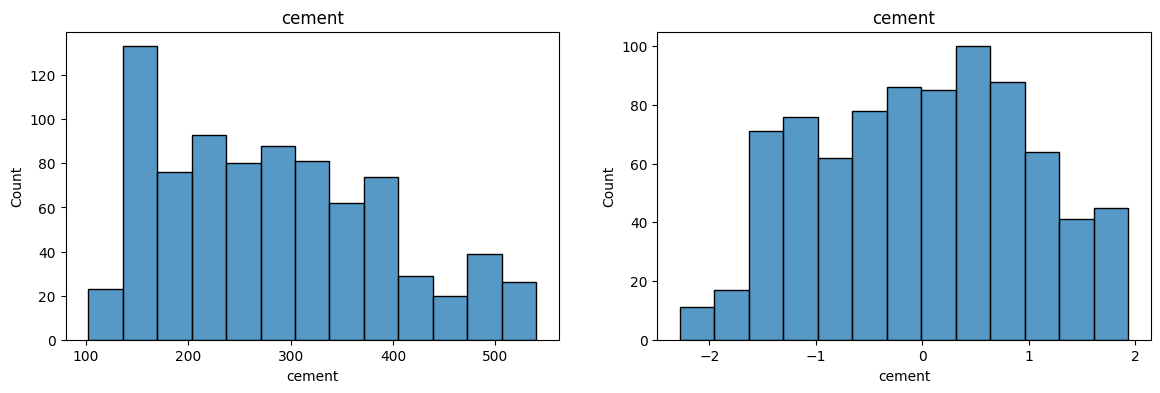

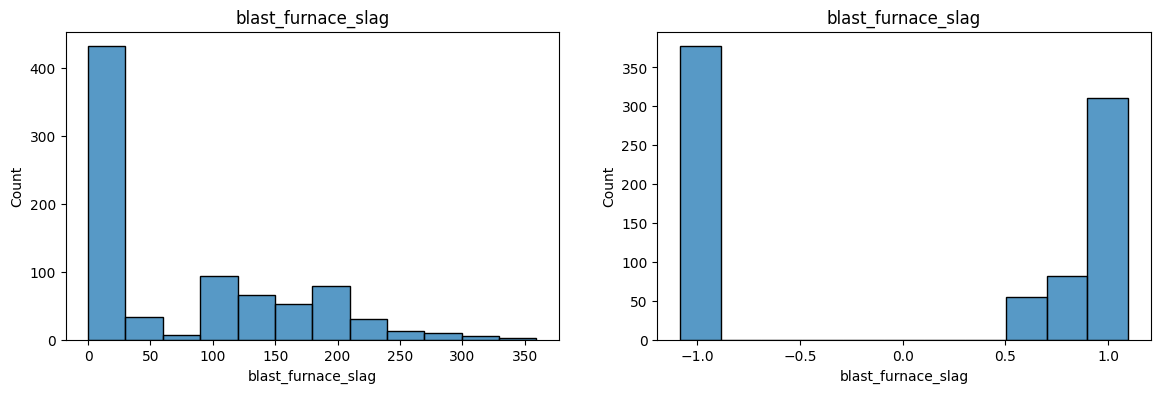

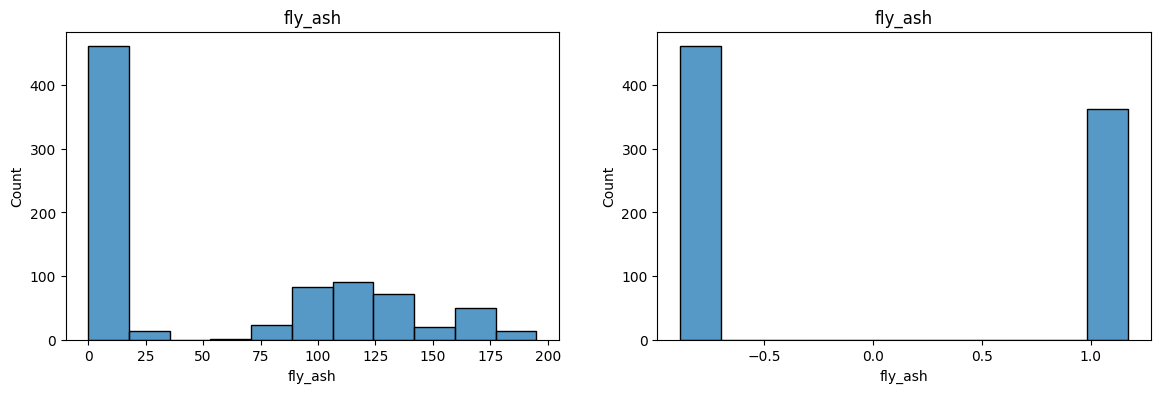

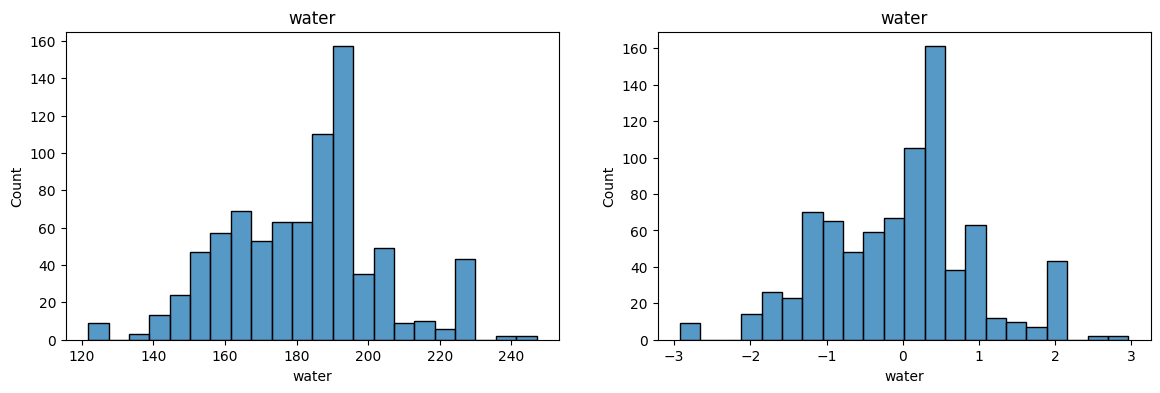

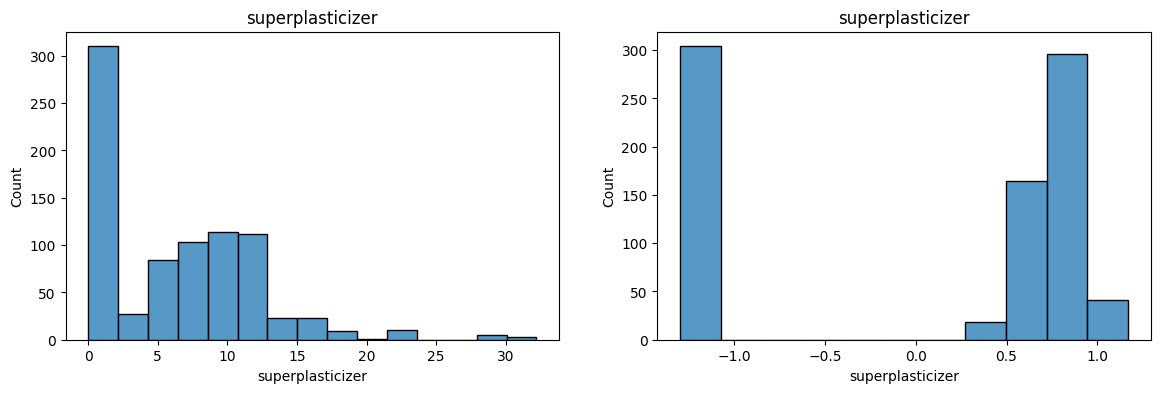

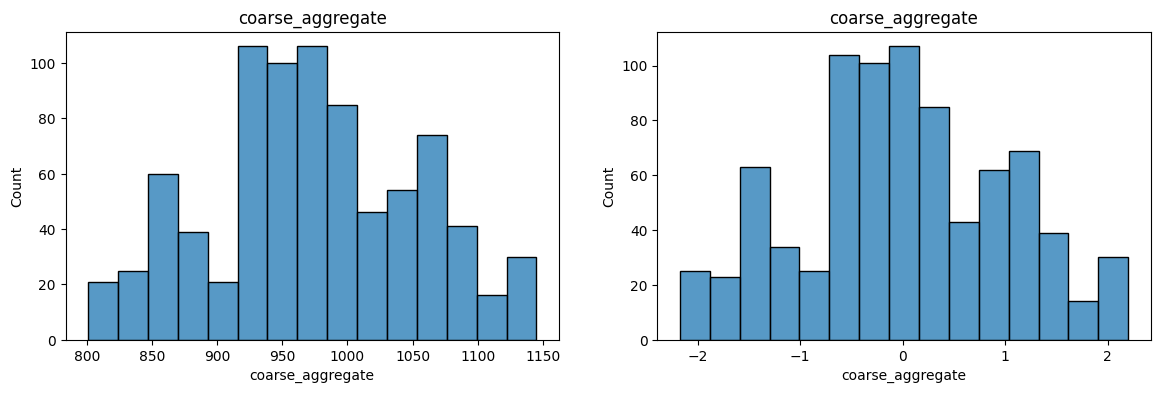

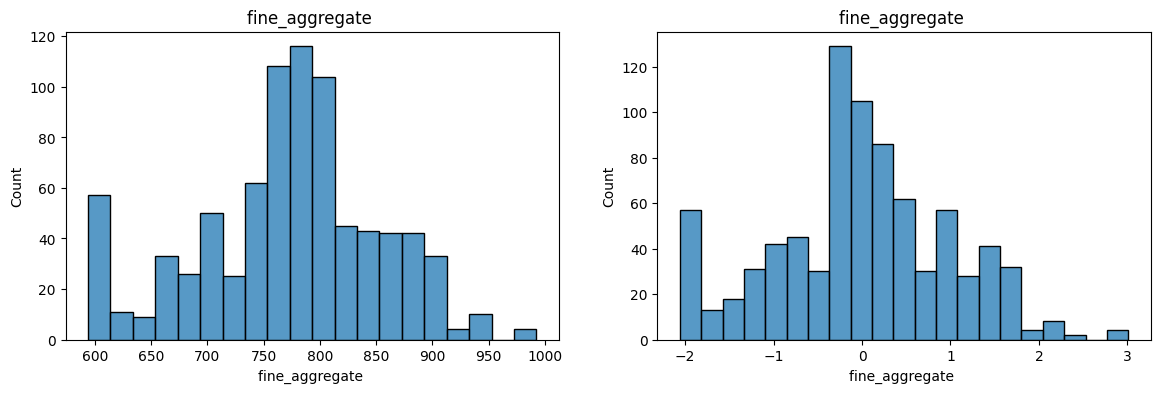

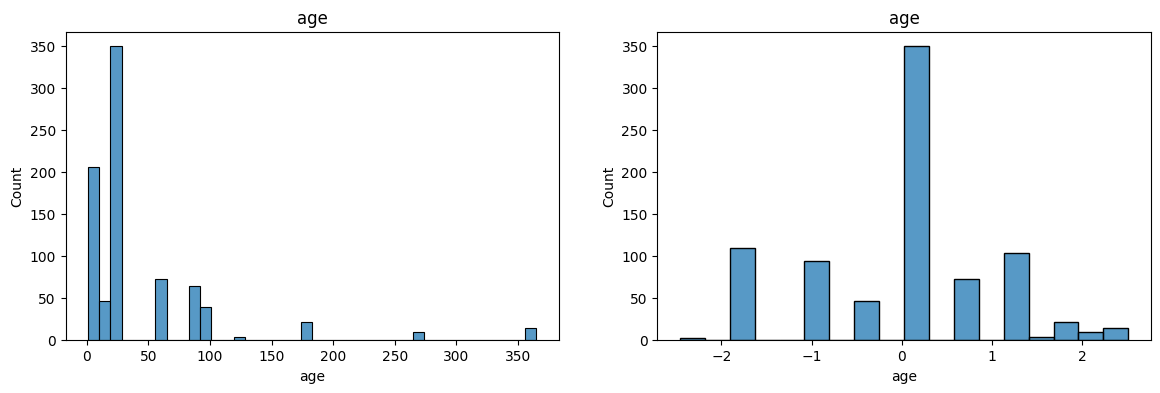

In [77]:

# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

##### Applying Linear Regression after Yeo-Johnson transformation

In [78]:
pt2 = PowerTransformer()

X_train_tran = pt2.fit_transform(X_train)

X_test_tran = pt2.transform(X_test)

lr= LinearRegression()
lr.fit(X_train_tran, y_train)

y_pred3 = lr.predict(X_test_tran)

print(r2_score(y_test, y_pred3))

pd.DataFrame({'cols' : X_train.columns, 'Yeo_Johnson_lambda': pt2.lambdas_})


0.8161906513339305


,cols,Yeo_Johnson_lambda
0,cement,0.174348
1,blast_furnace_slag,0.015715
2,fly_ash,-0.161447
3,water,0.771307
4,superplasticizer,0.253935
5,coarse_aggregate,1.130050
6,fine_aggregate,1.783100
7,age,0.019885


In [79]:

# Using cross val score

pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6834625134285747

*A slight improvement in the accuracy*